## Setup

This Jupyter notebook loads the raw amplitude and Mel spectrogram data files as numpy arrays.

Download the data files [here](https://console.cloud.google.com/storage/browser/cs181_practical_data).  This notebook assumes that the data files as located in the same directory.

### Load raw amplitude data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [ ]:
if 'Xtest_amp.npy' not in os.listdir():
    !gsutil cp gs://cs181_practical_data/Xtrain_amp.npy ./
    !gsutil cp gs://cs181_practical_data/ytrain_amp.npy ./
    !gsutil cp gs://cs181_practical_data/Xtest_amp.npy ./
    !gsutil cp gs://cs181_practical_data/ytest_amp.npy ./
    !gsutil cp gs://cs181_practical_data/Xtrain_mel.npy ./
    !gsutil cp gs://cs181_practical_data/ytrain_mel.npy ./
    !gsutil cp gs://cs181_practical_data/Xtest_mel.npy ./
    !gsutil cp gs://cs181_practical_data/ytest_mel.npy ./

In [2]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [3]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [4]:
# Load train data

X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [5]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [6]:
# Load test data

X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [7]:
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

## Part A

### A.1 Logistic Regression

In [8]:
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

In [11]:
from sklearn.linear_model import LogisticRegression

In [14]:

vanilla_amp = LogisticRegression()
vanilla_amp.fit(X_amp_train, y_amp_train)

vanilla_mel = LogisticRegression()
vanilla_mel.fit(X_mel_train_flat, y_mel_train)

/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

def get_acc(ground, preds):
    print("Mean accuracy: ", round(accuracy_score(ground, preds), 3))
    print("Balanced accuracy: ", round(balanced_accuracy_score(ground, preds), 3))
    
def get_report(ground, preds):
    target_names = ["0","1","2","3","4","5","6","7","8","9"]
    print(classification_report(ground, preds, target_names=target_names))

def get_conf(ground, preds):
    cfm = confusion_matrix(ground, preds)
    sns.heatmap(cfm, annot=True)
#    plt.xlabel('Predicted Class')
#    plt.ylabel('True Class')
    plt.show()

In [16]:
va_preds = vanilla_amp.predict(X_amp_test)
vm_preds = vanilla_mel.predict(X_mel_test_flat)

Amp
Mean accuracy:  0.179
Balanced accuracy:  0.148
              precision    recall  f1-score   support

           0       0.17      0.29      0.21       300
           1       0.00      0.00      0.00        39
           2       0.18      0.34      0.24       299
           3       0.17      0.12      0.14       229
           4       0.10      0.01      0.02       264
           5       0.25      0.31      0.28       264
           6       1.00      0.07      0.12        30
           7       0.13      0.04      0.06       236
           8       0.11      0.14      0.12       236
           9       0.22      0.16      0.18       300

    accuracy                           0.18      2197
   macro avg       0.23      0.15      0.14      2197
weighted avg       0.18      0.18      0.16      2197



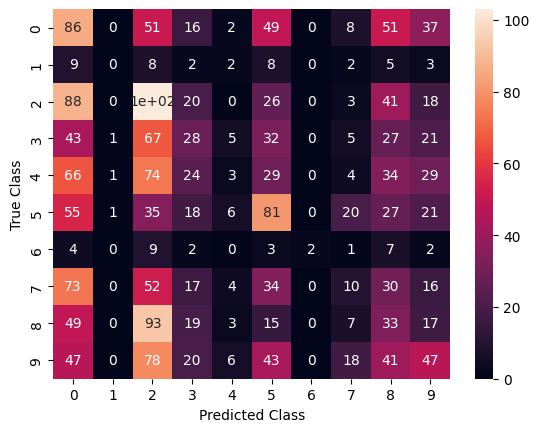

Mel
Mean accuracy:  0.35
Balanced accuracy:  0.379
              precision    recall  f1-score   support

           0       0.30      0.23      0.26       300
           1       0.22      0.38      0.28        39
           2       0.36      0.30      0.33       299
           3       0.37      0.21      0.27       229
           4       0.29      0.50      0.37       264
           5       0.37      0.49      0.42       264
           6       0.69      0.60      0.64        30
           7       0.33      0.33      0.33       236
           8       0.48      0.50      0.49       236
           9       0.34      0.25      0.29       300

    accuracy                           0.35      2197
   macro avg       0.38      0.38      0.37      2197
weighted avg       0.36      0.35      0.34      2197



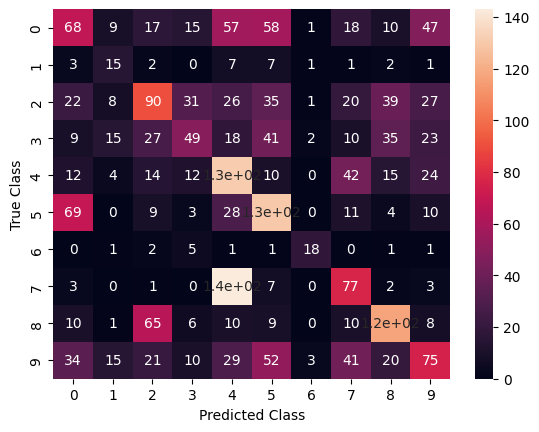

In [17]:
print("Amp")
get_acc(y_amp_test, va_preds)
get_report(y_amp_test, va_preds)
get_conf(y_amp_test, va_preds)

print("Mel")
get_acc(y_mel_test, vm_preds)
get_report(y_mel_test, vm_preds)
get_conf(y_mel_test, vm_preds)

### A.2 Normalization

In [18]:
test = np.median(X_mel_train_flat, axis=0)
print(test[200])
print(test[10000])

0.5699805
0.0003521006


In [19]:
from sklearn.preprocessing import normalize

X_mel_train_norm = normalize(X_mel_train_flat, axis=0)
X_mel_train_norm.shape

X_mel_test_norm = normalize(X_mel_test_flat, axis=0)

In [20]:
vanilla_mel_norm = LogisticRegression()
vanilla_mel_norm.fit(X_mel_train_norm, y_mel_train)

/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Mean accuracy:  0.371
Balanced accuracy:  0.38
              precision    recall  f1-score   support

           0       0.24      0.12      0.16       300
           1       0.73      0.62      0.67        39
           2       0.29      0.84      0.43       299
           3       0.38      0.20      0.26       229
           4       0.40      0.43      0.41       264
           5       0.30      0.19      0.23       264
           6       0.53      0.27      0.36        30
           7       0.48      0.38      0.42       236
           8       0.57      0.45      0.50       236
           9       0.48      0.30      0.37       300

    accuracy                           0.37      2197
   macro avg       0.44      0.38      0.38      2197
weighted avg       0.40      0.37      0.35      2197



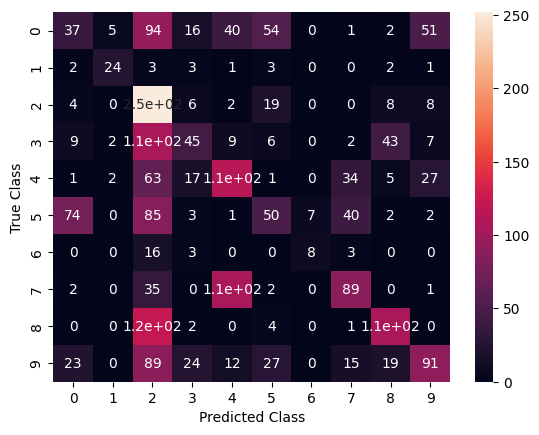

In [21]:
vmn_preds = vanilla_mel_norm.predict(X_mel_test_norm)

get_acc(y_mel_test, vmn_preds)
get_report(y_mel_test, vmn_preds)
get_conf(y_mel_test, vmn_preds)

In [22]:
X_amp_train_norm = normalize(X_amp_train, axis=0)
X_amp_train_norm.shape

X_amp_test_norm = normalize(X_amp_test, axis=0)

In [23]:
vanilla_amp_norm = LogisticRegression()
vanilla_amp_norm.fit(X_amp_train_norm, y_amp_train)

/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Mean accuracy:  0.207
Balanced accuracy:  0.17
              precision    recall  f1-score   support

           0       0.20      0.24      0.22       300
           1       0.17      0.03      0.04        39
           2       0.24      0.62      0.34       299
           3       0.27      0.09      0.13       229
           4       0.12      0.04      0.06       264
           5       0.22      0.26      0.24       264
           6       1.00      0.07      0.12        30
           7       0.10      0.08      0.09       236
           8       0.20      0.12      0.15       236
           9       0.20      0.16      0.18       300

    accuracy                           0.21      2197
   macro avg       0.27      0.17      0.16      2197
weighted avg       0.20      0.21      0.18      2197



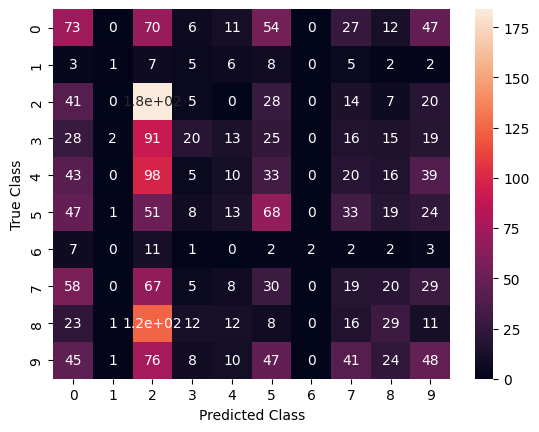

In [24]:
van_preds = vanilla_amp_norm.predict(X_amp_test_norm)

get_acc(y_amp_test, van_preds)
get_report(y_amp_test, van_preds)
get_conf(y_amp_test, van_preds)

### A.3 Parameter Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
mel_l1 = LogisticRegression(penalty='l1', solver='saga')
mel_l1.fit(X_mel_train_flat, y_mel_train)

/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [29]:
mel_l1l2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
mel_l1l2.fit(X_mel_train_flat, y_mel_train)

/Users/MikeH/Current Classes/Machine Learning (CS 181)/audio-practical/vir/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
mel_l1_preds = mel_l1.predict(X_mel_test_flat)
mel_l1l2_preds = mel_l1l2.predict(X_mel_test_flat)

get_acc(y_mel_test, mel_l1_preds)
get_report(y_mel_test, mel_l1_preds)
get_conf(y_mel_test, mel_l1_preds)

get_acc(y_mel_test, mel_l1l2_preds)
get_report(y_mel_test, mel_l1l2_preds)
get_conf(y_mel_test, mel_l1l2_preds)

In [ ]:
import pickle

In [ ]:
with open("models/vanilla_amp.pickle", "wb") as file:
   pickle.dump(vanilla_amp, file)

with open("models/vanilla_mel.pickle", "wb") as file:
   pickle.dump(vanilla_mel, file)

with open("models/vanilla_mel_norm.pickle", "wb") as file:
   pickle.dump(vanilla_mel_norm, file)

In [ ]:
with open("models/vanilla_amp.pickle", "rb") as file:
   vanilla_amp = pickle.load(file)

with open("models/vanilla_mel.pickle", "rb") as file:
   vanilla_mel = pickle.load(file)

with open("models/vanilla_mel_norm.pickle", "rb") as file:
   vanilla_mel_norm = pickle.load(file)

In [5]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_mel = RandomForestClassifier(n_estimators=900, max_depth=None, n_jobs=-1)
rf_mel.fit(X_mel_train_flat, y_mel_train)

RandomForestClassifier(n_estimators=900, n_jobs=-1)

Mean accuracy:  0.484
Balanced accuracy:  0.452
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       300
           1       0.75      0.23      0.35        39
           2       0.41      0.54      0.47       299
           3       0.55      0.44      0.49       229
           4       0.45      0.56      0.50       264
           5       0.56      0.44      0.49       264
           6       1.00      0.37      0.54        30
           7       0.46      0.46      0.46       236
           8       0.58      0.58      0.58       236
           9       0.50      0.55      0.52       300

    accuracy                           0.48      2197
   macro avg       0.57      0.45      0.48      2197
weighted avg       0.50      0.48      0.48      2197



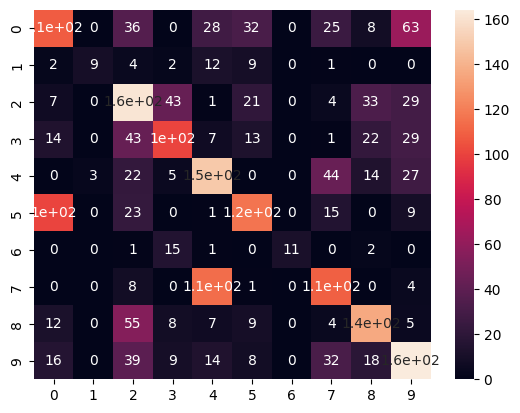

In [21]:
rfm_preds = rf_mel.predict(X_mel_test_flat)
get_acc(y_mel_test, rfm_preds)
get_report(y_mel_test, rfm_preds)
get_conf(y_mel_test, rfm_preds)

## B. Grid search

### B.1 Lazy Predict

In [14]:
from lazypredict.Supervised import LazyClassifier
import random

In [32]:
temp = random.sample(list(zip(X_mel_train_flat,y_mel_train)), 1000)
small_mel_train = [[i for i,j in temp],
                   [j for i,j in temp]]

small_train_X = np.array(small_mel_train[0])
small_train_Y = np.array(small_mel_train[1])

In [33]:
temp = random.sample(list(zip(X_mel_test_flat,y_mel_test)), 1000)
small_mel_test = [[i for i,j in temp],
                   [j for i,j in temp]]

small_test_X = np.array(small_mel_test[0])
small_test_Y = np.array(small_mel_test[1])

In [34]:
clf = LazyClassifier(verbose=0, custom_metric=None)
models, predictions = clf.fit(small_train_X, small_test_X, small_train_Y, small_test_Y)
models

100%|██████████| 29/29 [15:54<00:00, 32.92s/it]  


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.50,0.49,None,0.50,88.35
LGBMClassifier,0.47,0.46,None,0.47,115.56
ExtraTreesClassifier,0.46,0.42,None,0.46,1.55
LogisticRegression,0.39,0.40,None,0.38,4.92
RandomForestClassifier,0.43,0.39,None,0.42,4.11
SGDClassifier,0.35,0.37,None,0.33,4.45
Perceptron,0.30,0.35,None,0.29,3.72
GaussianNB,0.33,0.33,None,0.32,0.64
NearestCentroid,0.35,0.33,None,0.34,0.44


### B.2 Random Forest

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tqdm

parameters = {
    'max_depth': [25, 50, 75, 100, None],
    'max_features': ['sqrt', 'log2', None],
}

# Create a logistic regression object
rf_model = RandomForestClassifier(bootstrap=True, n_estimators=500)
rf_mel = GridSearchCV(rf_model, parameters)
rf_mel.fit(X_mel_train_flat, y_mel_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters: ', rf_mel.best_params_)

In [ ]:
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

### B.3 Random Search

## C. Optional

### C.1 PCA

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3000)

X_mel_train_pca = pca.fit_transform(X_mel_train_flat)
X_mel_test_pca = pca.transform(X_mel_test_flat)
X_mel_train_pca.shape
X_mel_test_pca.shape

(2197, 3000)

In [63]:
from sklearn.linear_model import LogisticRegression

In [68]:
mel_pca = LogisticRegression()
mel_pca.fit(X_mel_train_pca, y_mel_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
mel_pca_preds = mel_pca.predict(X_mel_test_pca)

Mean accuracy:  0.349
Balanced accuracy:  0.366
              precision    recall  f1-score   support

           0       0.28      0.23      0.25       300
           1       0.28      0.46      0.35        39
           2       0.32      0.54      0.40       299
           3       0.40      0.17      0.24       229
           4       0.30      0.40      0.34       264
           5       0.38      0.42      0.40       264
           6       0.39      0.43      0.41        30
           7       0.39      0.31      0.35       236
           8       0.51      0.48      0.50       236
           9       0.32      0.20      0.25       300

    accuracy                           0.35      2197
   macro avg       0.36      0.37      0.35      2197
weighted avg       0.36      0.35      0.34      2197



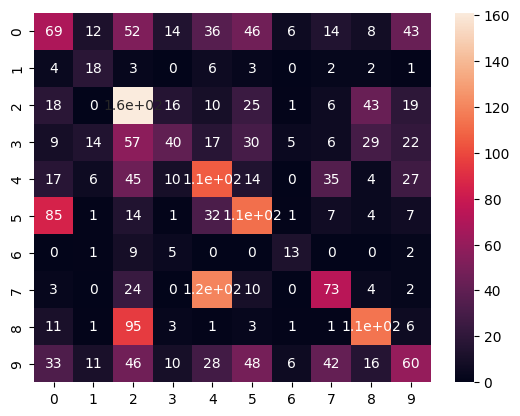

In [70]:
get_acc(y_mel_test, mel_pca_preds)
get_report(y_mel_test, mel_pca_preds)
get_conf(y_mel_test, mel_pca_preds)

In [74]:
from sklearn.ensemble import RandomForestClassifier
test = RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=-1)
test.fit(X_mel_train_pca, y_mel_train)
test_preds = test.predict(X_mel_test_pca)

In [ ]:
fig = plt.figure(dpi=150, figsize=(8,6))
ax = plt.axes(projection ="3d")

for sound in range(10):

    samples = X_mel_train_pca[y_mel_train == sound]
    print(samples)

    ax.scatter3D(samples[:,0], samples[:,1], samples[:,2], label=str(sound))

plt.xlabel = "PCA Component 1"
plt.ylabel = "PCA Component 2"
plt.zlabel = "PCA Component 3"
plt.legend(loc = "upper right", ncol=2)
plt.tight_layout()
plt.show()

In [ ]:
X_amp_train_pca = pca.fit_transform(X_amp_train)
X_amp_train_pca.shape

In [ ]:
# fig = plt.figure(dpi=150, figsize=(8,6))
# ax = plt.axes(projection ="3d")
plt.figure(dpi=150, figsize=(8,6))

for sound in range(10):

    samples = X_amp_train_pca[y_amp_train == sound]
    print(samples)

    # ax.scatter3D(samples[:,0], samples[:,1], samples[:,2], label=str(sound))
    plt.scatter(samples[:,0], samples[:,1], label=str(sound))

plt.xlabel = "PCA Component 1"
plt.ylabel = "PCA Component 2"
# plt.zlabel = "PCA Component 3"
plt.legend(loc = "upper right", ncol=2)
plt.tight_layout()
plt.show()

### C.2 Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=3, kernel='cosine')

X_mel_train_kpca = kpca.fit_transform(X_mel_train_flat)
X_mel_train_kpca.shape

(5553, 3)

In [ ]:
mel_kpca = LogisticRegression()
mel_kpca.fit(X_mel_train_kpca, y_mel_train)

LogisticRegression()

In [ ]:
mkpca_preds = mel_kpca.predict(kpca.transform(X_mel_test_flat))
get_acc(y_mel_test, mkpca_preds)
get_report(y_mel_test, mkpca_preds)
get_conf(y_mel_test, mkpca_preds)

In [ ]:
# fig = plt.figure(dpi=150, figsize=(8,6))
# ax = plt.axes(projection ="3d")
plt.figure(dpi=150, figsize=(8,6))

for sound in range(10):

    samples = X_mel_train_kpca[y_mel_train == sound]
    print(samples)

    # ax.scatter3D(samples[:,0], samples[:,1], samples[:,2], label=str(sound))
    plt.scatter(samples[:,0], samples[:,1], label=str(sound))

plt.xlabel = "PCA Component 1"
plt.ylabel = "PCA Component 2"
# plt.zlabel = "PCA Component 3"
plt.legend(loc = "upper right", ncol=2)
plt.tight_layout()
plt.show()

In [ ]:
with open("models/kpca_mel.pickle", "wb") as file:
   pickle.dump(mel_kpca, file)

### C.3 Sparse PCA

In [16]:
from sklearn.decomposition import SparsePCA

In [17]:
sparse_pca = SparsePCA(n_components=1000)
X_mel_train_sparse = sparse_pca.fit_transform(X_mel_train_flat)

In [ ]:
mel_sparse_pca = LogisticRegression()
mel_sparse_pca.fit(X_mel_train_sparse, y_mel_train)

In [ ]:
m_sparse_pca_preds = mel_sparse_pca.predict(sparse_pca.fit_transform(X_mel_test_flat))
get_acc(y_mel_test, m_sparse_pca_preds)
get_report(y_mel_test, m_sparse_pca_preds)
get_conf(y_mel_test, m_sparse_pca_preds)

In [ ]:
with open("models/mel_sparse_pca.pickle", "wb") as file:
   pickle.dump(mel_sparse_pca, file)

In [ ]:
with open("models/vanilla_mel.pickle", "rb") as file:
   vanilla_mel = pickle.load(file)

(5553, 3)

### Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [ ]:
del X_mel_train